## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## VISUALISING THE DATA

In [2]:
data=pd.read_csv('D:/netflix_titles.csv')

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
data.shape

(7787, 12)

In [5]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'description'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  genre         7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
genre           object
description     object
dtype: object

## CLEANING AND PREPARING THE DATA

### Removing columns which are not useful

In [8]:
data.drop(['director','cast','description','duration'],axis='columns',inplace=True)
data.head()

,show_id,type,title,country,date_added,release_year,rating,genre
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,07:19,Mexico,"December 23, 2016",2016,TV-MA,"Dramas, International Movies"
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,"Horror Movies, International Movies"
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,Dramas


### Checking for duplicated data 

In [9]:
data[data.duplicated()]

,show_id,type,title,country,date_added,release_year,rating,genre


### Checking and removing null values

In [10]:
data.isnull()

,show_id,type,title,country,date_added,release_year,rating,genre
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
7782,False,False,False,False,False,False,False,False
7783,False,False,False,False,False,False,False,False
7784,False,False,False,True,False,False,False,False
7785,False,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

show_id           0
type              0
title             0
country         507
date_added       10
release_year      0
rating            7
genre             0
dtype: int64

<AxesSubplot:>

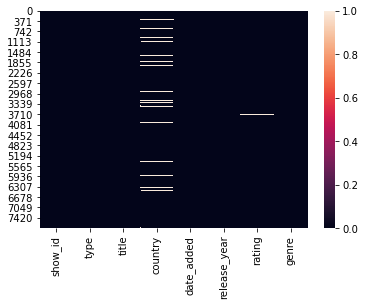

In [12]:
sns.heatmap(data.isnull())

In [13]:
data.dropna(axis=0,how='any', inplace=True)
data.shape

(7265, 8)

<AxesSubplot:>

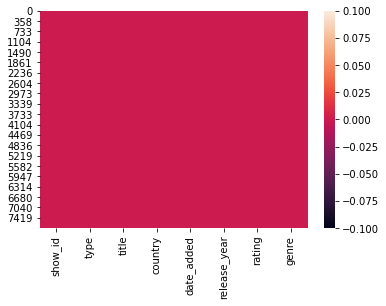

In [14]:
sns.heatmap(data.isnull())

In [15]:
data.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
genre           0
dtype: int64

### Correcting the data type of column

In [16]:
data.date_new=pd.to_datetime(data.date_added)
data.dtypes

<ipython-input-16-4b88cc476baa>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.date_new=pd.to_datetime(data.date_added)


show_id         object
type            object
title           object
country         object
date_added      object
release_year     int64
rating          object
genre           object
dtype: object

In [17]:
data.head(5)

,show_id,type,title,country,date_added,release_year,rating,genre
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,07:19,Mexico,"December 23, 2016",2016,TV-MA,"Dramas, International Movies"
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,"Horror Movies, International Movies"
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,Dramas


# PERFORMING THE ANALYSIS

The total number of TV Shows and Movies produces are- 



<AxesSubplot:xlabel='type', ylabel='count'>

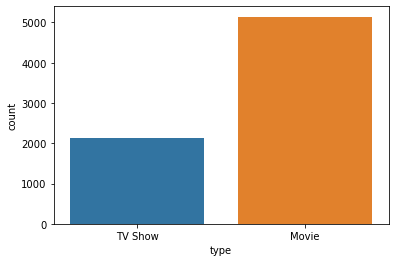

In [18]:
print('The total number of TV Shows and Movies produces are- \n')
data.type.value_counts()
sns.countplot(x=data.type)

In [19]:
most_productions = data.date_new.dt.year.value_counts()
print('The total number of TV shows and Movies produced in each year are - \n' + str(most_productions))

The total number of TV shows and Movies produced in each year are - 
2019    1993
2020    1890
2018    1562
2017    1157
2016     421
2021     102
2015      83
2014      25
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: date_added, dtype: int64


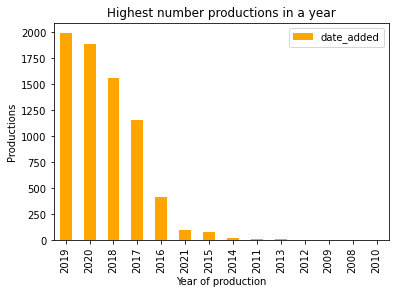

In [20]:
most_productions.plot(kind='bar',color='orange')
plt.title('Highest number productions in a year')
plt.xlabel('Year of production')
plt.ylabel('Productions')
plt.legend()
plt.show()

In [21]:
r=data.rating.nunique()
print('The total number of ratings in the dataset is'+' ' + str(r))
rt=data.rating.unique()
print('The total types of ratings in the dataset is'+' ' + str(rt))

The total number of ratings in the dataset is 14
The total types of ratings in the dataset is ['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' 'TV-Y7' 'PG' 'G'
 'NC-17' 'TV-Y7-FV' 'UR']


In [22]:
print('Total number of each type of rating present-')
data.rating.value_counts()

Total number of each type of rating present-


TV-MA       2702
TV-14       1792
TV-PG        739
R            663
PG-13        383
PG           244
TV-Y7        220
TV-Y         210
TV-G         177
NR            83
G             39
UR             5
TV-Y7-FV       5
NC-17          3
Name: rating, dtype: int64

Graphical representation of the above data is depicted below -


<AxesSubplot:xlabel='count', ylabel='rating'>

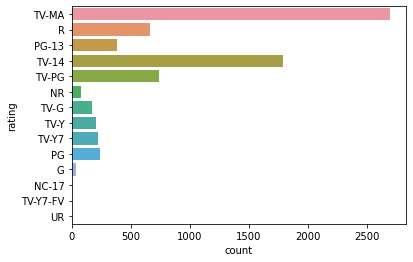

In [23]:
print('Graphical representation of the above data is depicted below -')
sns.countplot(y=data['rating'])

In [24]:
tv_rating=data[data.type=='TV Show']
tv_rating.head()

,show_id,type,title,country,date_added,release_year,rating,genre
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &..."
5,s6,TV Show,46,Turkey,"July 1, 2017",2016,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
11,s12,TV Show,1983,"Poland, United States","November 30, 2018",2018,TV-MA,"Crime TV Shows, International TV Shows, TV Dramas"
12,s13,TV Show,1994,Mexico,"May 17, 2019",2019,TV-MA,"Crime TV Shows, Docuseries, International TV S..."
24,s25,TV Show,​SAINT SEIYA: Knights of the Zodiac,Japan,"January 23, 2020",2020,TV-14,"Anime Series, International TV Shows"


In [25]:
print('Ratings of all the TV Shows')
tv_rating.rating.value_counts()

Ratings of all the TV Shows


TV-MA       935
TV-14       576
TV-PG       256
TV-Y7       144
TV-Y        131
TV-G         74
NR            4
TV-Y7-FV      1
R             1
Name: rating, dtype: int64

In [26]:
movies_rating=data[data.type=='Movie']
movies_rating.head()

,show_id,type,title,country,date_added,release_year,rating,genre
1,s2,Movie,07:19,Mexico,"December 23, 2016",2016,TV-MA,"Dramas, International Movies"
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,"Horror Movies, International Movies"
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,Dramas
6,s7,Movie,122,Egypt,"June 1, 2020",2019,TV-MA,"Horror Movies, International Movies"


In [27]:
print('Ratings of all movies')
movies_rating.rating.value_counts()

Ratings of all movies


TV-MA       1767
TV-14       1216
R            662
TV-PG        483
PG-13        383
PG           244
TV-G         103
TV-Y          79
NR            79
TV-Y7         76
G             39
UR             5
TV-Y7-FV       4
NC-17          3
Name: rating, dtype: int64

In [28]:
print('All the movies which got NR rating')
movies_rating[(movies_rating.type=='Movie') & (movies_rating.rating=='NR')].head()

All the movies which got NR rating


,show_id,type,title,country,date_added,release_year,rating,genre
25,s26,Movie,(T)ERROR,United States,"June 30, 2016",2015,NR,Documentaries
62,s63,Movie,13 Cameras,United States,"August 13, 2016",2015,NR,"Horror Movies, Independent Movies, Thrillers"
115,s116,Movie,4th Man Out,United States,"May 5, 2016",2015,NR,"Comedies, LGBTQ Movies"
220,s221,Movie,A Russell Peters Christmas,Canada,"November 1, 2013",2011,NR,Stand-Up Comedy
299,s300,Movie,Act of Vengeance,"Turkey, United States","September 29, 2018",2010,NR,"Action & Adventure, International Movies"


In [29]:
print('All the TV Shows which got NR rating')
tv_rating[(tv_rating.type=='TV Show') & (tv_rating.rating=='NR')].head()

All the TV Shows which got NR rating


,show_id,type,title,country,date_added,release_year,rating,genre
1943,s1944,TV Show,El Barco,Spain,"July 1, 2017",2013,NR,"International TV Shows, Romantic TV Shows, Spa..."
4512,s4513,TV Show,North & South,United Kingdom,"March 31, 2017",2004,NR,"British TV Shows, Romantic TV Shows, TV Dramas"
5312,s5313,TV Show,Russell Peters vs. the World,United States,"October 14, 2013",2013,NR,"Docuseries, Stand-Up Comedy & Talk Shows"
6424,s6425,TV Show,The Great Train Robbery,United Kingdom,"March 31, 2017",2013,NR,"British TV Shows, Crime TV Shows, Internationa..."


In [30]:
print('All the movies released after the year 2009 which got rating G')
movies_rating[(movies_rating.type=='Movie') & (movies_rating.rating=='G') & (movies_rating.release_year>2009)]

All the movies released after the year 2009 which got rating G


,show_id,type,title,country,date_added,release_year,rating,genre
155,s156,Movie,A Champion Heart,United States,"April 14, 2020",2018,G,"Children & Family Movies, Dramas"
227,s228,Movie,A Shaun the Sheep Movie: Farmageddon,"United Kingdom, France, Belgium, United States...","February 14, 2020",2020,G,"Children & Family Movies, Comedies"
1203,s1204,Movie,Canvas,United States,"December 11, 2020",2020,G,"Children & Family Movies, Dramas"
2396,s2397,Movie,Ghost of the Mountains,United States,"September 13, 2017",2017,G,Documentaries
2545,s2546,Movie,Growing Up Wild,United States,"February 19, 2017",2016,G,"Children & Family Movies, Documentaries"
3256,s3257,Movie,Justin Bieber: Never Say Never,United States,"January 1, 2018",2011,G,"Documentaries, Music & Musicals"
5005,s5006,Movie,Pup Star,Canada,"October 29, 2016",2016,G,"Children & Family Movies, Comedies"
5007,s5008,Movie,Pup Star: World Tour,"Canada, Japan, United States","May 5, 2018",2018,G,"Children & Family Movies, Comedies, Music & Mu..."
6758,s6759,Movie,The Pirate Fairy,United States,"June 15, 2014",2014,G,Children & Family Movies
7102,s7103,Movie,Tini: The New Life of Violetta,"Spain, Italy, Argentina","February 19, 2017",2016,G,"Children & Family Movies, Music & Musicals"


In [31]:
print('All the TV Shows released in India')
tv_rating[(tv_rating.type=='TV Show') & (tv_rating.country=='India')].head()

All the TV Shows released in India


,show_id,type,title,country,date_added,release_year,rating,genre
86,s87,TV Show,21 Sarfarosh: Saragarhi 1897,India,"December 1, 2018",2018,TV-14,"International TV Shows, TV Dramas"
132,s133,TV Show,7 (Seven),India,"July 30, 2019",2019,TV-14,TV Shows
340,s341,TV Show,Agent Raghav,India,"April 15, 2017",2015,TV-14,"Crime TV Shows, International TV Shows, TV Act..."
364,s365,TV Show,Akbar Birbal,India,"March 31, 2020",2019,TV-G,"Kids' TV, TV Comedies, TV Dramas"
533,s534,TV Show,Anjaan: Rural Myths,India,"December 15, 2018",2018,TV-14,"International TV Shows, TV Horror, TV Thrillers"


In [32]:
print('All the movies released in India between the year 2010 and 2015')
movies_rating[(movies_rating.type=='Movie') & (movies_rating.country=='India') & (movies_rating.release_year>2010) & (movies_rating.release_year<2015)].head()

All the movies released in India between the year 2010 and 2015


,show_id,type,title,country,date_added,release_year,rating,genre
59,s60,Movie,1000 Rupee Note,India,"December 1, 2016",2014,TV-14,"Dramas, International Movies"
78,s79,Movie,2 States,India,"August 4, 2018",2014,TV-PG,"Comedies, Dramas, International Movies"
129,s130,Movie,6-5=2,India,"November 1, 2017",2014,TV-MA,"Horror Movies, International Movies, Thrillers"
136,s137,Movie,7 Khoon Maaf,India,"August 2, 2018",2011,TV-MA,"Dramas, International Movies, Thrillers"
266,s267,Movie,Aajcha Divas Majha,India,"January 1, 2018",2013,TV-PG,"Comedies, Dramas, International Movies"


In [33]:
print('Total number of TV Shows produced in each country-')
tv_rating.country.value_counts()

Total number of TV Shows produced in each country-


United States                    699
United Kingdom                   203
Japan                            155
South Korea                      147
India                             71
                                ... 
Canada, Germany, South Africa      1
Singapore, United States           1
Canada, Japan, Netherlands         1
United Kingdom, Singapore          1
United Kingdom, Australia          1
Name: country, Length: 183, dtype: int64

In [34]:
print('Total number of Movies produced in each country -')
movies_rating.country.value_counts().head()

Total number of Movies produced in each country -


United States     1847
India              852
United Kingdom     193
Canada             118
Spain               89
Name: country, dtype: int64

Text(0.5, 1.0, 'Top 15 Genres of TV Show')

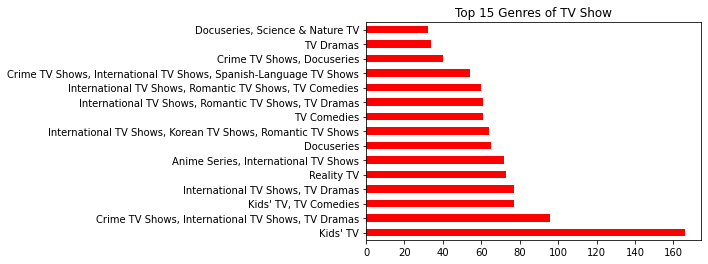

In [35]:
data[data.type=="TV Show"]["genre"].value_counts()[:15].plot(kind="barh",color="red")
plt.title("Top 15 Genres of TV Show")

#### This is the end of my analysis 